In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np
from datetime import datetime
pd.set_option('display.max_columns', None)

In [12]:
df = pd.read_csv(r'C:...\aac_intakes_outcomes.csv')
df.head()

,age_upon_outcome,animal_id_outcome,date_of_birth,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,outcome_month,outcome_year,outcome_monthyear,outcome_weekday,outcome_hour,outcome_number,dob_year,dob_month,dob_monthyear,age_upon_intake,animal_id_intake,animal_type,breed,color,found_location,intake_condition,intake_type,sex_upon_intake,count,age_upon_intake_(days),age_upon_intake_(years),age_upon_intake_age_group,intake_datetime,intake_month,intake_year,intake_monthyear,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days
0,10 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,3650,10.0,"(7.5, 10.0]",2017-12-07 14:07:00,12,2017,2017-12,Thursday,0,1.0,2007,7,2017-12,10 years,A006100,Dog,Spinone Italiano Mix,Yellow/White,Colony Creek And Hunters Trace in Austin (TX),Normal,Stray,Neutered Male,1,3650,10.0,"(7.5, 10.0]",2017-12-07 00:00:00,12,2017,2017-12,Thursday,14,1.0,0 days 14:07:00.000000000,0.588194
1,7 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,2555,7.0,"(5.0, 7.5]",2014-12-20 16:35:00,12,2014,2014-12,Saturday,16,2.0,2007,7,2014-12,7 years,A006100,Dog,Spinone Italiano Mix,Yellow/White,8700 Research Blvd in Austin (TX),Normal,Public Assist,Neutered Male,1,2555,7.0,"(5.0, 7.5]",2014-12-19 10:21:00,12,2014,2014-12,Friday,10,2.0,1 days 06:14:00.000000000,1.259722
2,6 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,2190,6.0,"(5.0, 7.5]",2014-03-08 17:10:00,3,2014,2014-03,Saturday,17,3.0,2007,7,2014-03,6 years,A006100,Dog,Spinone Italiano Mix,Yellow/White,8700 Research in Austin (TX),Normal,Public Assist,Neutered Male,1,2190,6.0,"(5.0, 7.5]",2014-03-07 14:26:00,3,2014,2014-03,Friday,14,3.0,1 days 02:44:00.000000000,1.113889
3,10 years,A047759,2004-04-02 00:00:00,Partner,Transfer,Neutered Male,3650,10.0,"(7.5, 10.0]",2014-04-07 15:12:00,4,2014,2014-04,Monday,15,1.0,2004,4,2014-04,10 years,A047759,Dog,Dachshund,Tricolor,Austin (TX),Normal,Owner Surrender,Neutered Male,1,3650,10.0,"(7.5, 10.0]",2014-04-02 15:55:00,4,2014,2014-04,Wednesday,15,1.0,4 days 23:17:00.000000000,4.970139
4,16 years,A134067,1997-10-16 00:00:00,NaN,Return to Owner,Neutered Male,5840,16.0,"(15.0, 17.5]",2013-11-16 11:54:00,11,2013,2013-11,Saturday,11,1.0,1997,10,2013-11,16 years,A134067,Dog,Shetland Sheepdog,Brown/White,12034 Research Blvd in Austin (TX),Injured,Public Assist,Neutered Male,1,5840,16.0,"(15.0, 17.5]",2013-11-16 09:02:00,11,2013,2013-11,Saturday,9,1.0,0 days 02:52:00.000000000,0.119444


# Research Question Q1
1. What is the distribution of animals time stay in shelter? what is the mean and the median time stay in?

In [13]:
df['time_in_shelter_hours'] = df['time_in_shelter_days'] * 24 
df['time_in_shelter_hours']

0         14.116667
1         30.233333
2         26.733333
3        119.283333
4          2.866667
            ...    
79667      1.850000
79668      1.283333
79669      1.150000
79670     42.300000
79671     19.533333
Name: time_in_shelter_hours, Length: 79672, dtype: float64

In [14]:
df['time_in_shelter_hours'].median()

119.69166666666666

Shortest time in shelter, in hours:0.0
Longest time in shelter, in hours:38548.666666666664


C:\Users\kentj\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


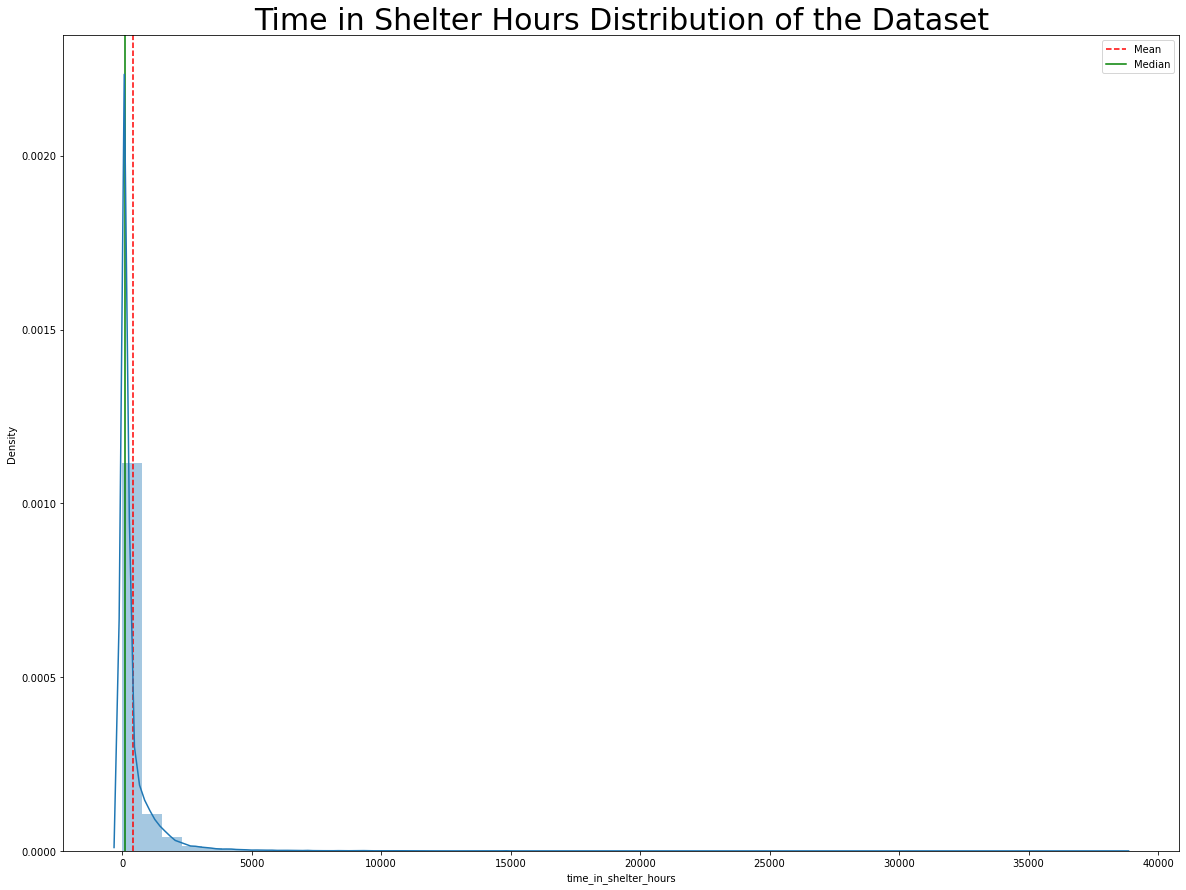

In [15]:
print('Shortest time in shelter, in hours:' + str(df['time_in_shelter_hours'].min()))
print('Longest time in shelter, in hours:' + str(df['time_in_shelter_hours'].max()))

plt.figure(figsize= (20, 15))
plt.title('Time in Shelter Hours Distribution of the Dataset',fontdict = {'fontsize': 30})
mean=df['time_in_shelter_hours'].mean()
median=df['time_in_shelter_hours'].median()
plt.axvline(mean, color='r', linestyle='--')
plt.axvline(median, color='g', linestyle='-')
plt.legend({'Mean':mean,'Median':median})
sns.distplot(df['time_in_shelter_hours']);

As expected, time_in_shelter_hours is extremely positive skewed. We can do a log1p to normalize the distribution. 

In [17]:
df['ln(time_in_shelter_hours)'] = np.log1p(df['time_in_shelter_hours'])

Shortest time in shelter, in hours:0.0
Longest time in shelter, in hours:10.559702732175017


C:\Users\kentj\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


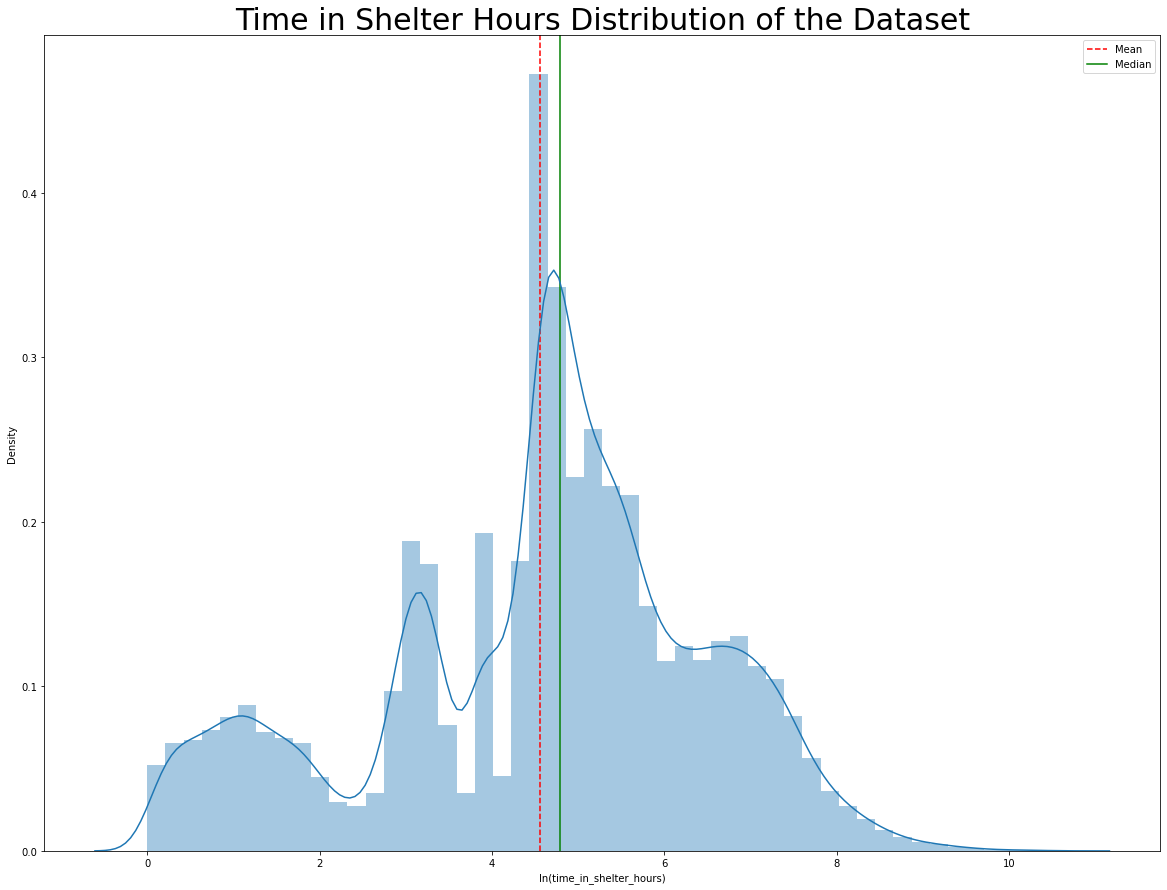

In [18]:
print('Shortest time in shelter, in hours:' + str(df['ln(time_in_shelter_hours)'].min()))
print('Longest time in shelter, in hours:' + str(df['ln(time_in_shelter_hours)'].max()))

plt.figure(figsize= (20, 15))
plt.title('Time in Shelter Hours Distribution of the Dataset',fontdict = {'fontsize': 30})
mean=df['ln(time_in_shelter_hours)'].mean()
median=df['ln(time_in_shelter_hours)'].median()
plt.axvline(mean, color='r', linestyle='--')
plt.axvline(median, color='g', linestyle='-')
plt.legend({'Mean':mean,'Median':median})
sns.distplot(df['ln(time_in_shelter_hours)']);

# Research Question 2: 
which year did we see the highest intake of animals? Which month did we see a highest intake of animals? is this trend consistent through out the years? 

In [19]:
df['intake_year'].value_counts() #if we exclude 2013 and 2018, since they are incomplete, 2015 has the highest intake. 

2015    18699
2014    18645
2016    17632
2017    17440
2013     4178
2018     3078
Name: intake_year, dtype: int64

In [63]:
df_intake_month = df[['intake_year','intake_month']].value_counts().reset_index().sort_values(by = 'intake_year', ascending = False)
df_intake_month

,intake_year,intake_month,0
53,2018,2,977
52,2018,3,1012
51,2018,1,1089
44,2017,2,1198
26,2017,4,1480
28,2017,10,1412
16,2017,7,1607
33,2017,3,1357
42,2017,1,1210
11,2017,9,1668


In [82]:
df_month1 = df.groupby(['intake_year','intake_month'])[['count']].count().reset_index()
df_month1

,intake_year,intake_month,count
0,2013,10,1587
1,2013,11,1321
2,2013,12,1270
3,2014,1,1270
4,2014,2,1190
5,2014,3,1482
6,2014,4,1534
7,2014,5,1956
8,2014,6,1795
9,2014,7,1885


<AxesSubplot:xlabel='intake_month', ylabel='count'>

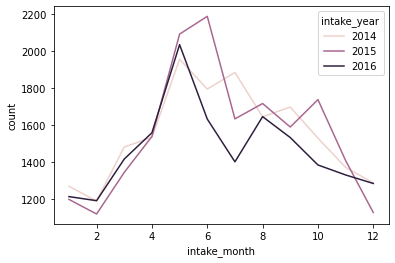

In [84]:
cond1 = df_month1['intake_year'] == 2014
cond2 = df_month1['intake_year'] == 2015
cond3 = df_month1['intake_year'] == 2016
df_intake_month1 = df_month1[cond1 | cond2 | cond3]
df_intake_month1
sns.lineplot(x = 'intake_month', y = 'count', data = df_intake_month1, hue = 'intake_year')

# it is quite interesting to note that intake numbers tend to rise after February, and begin to decline between May and June all the way till end of the year. 

# Research Question 3 
What are the intake types? is there any trend identified for the intake types as the years past? 


In [56]:
df['intake_type'].value_counts()

Stray                 55935
Owner Surrender       15028
Public Assist          4994
Wildlife               3464
Euthanasia Request      251
Name: intake_type, dtype: int64

In [58]:
condA = df['intake_year'] == 2014 
condB = df['intake_year'] == 2015
condC =df['intake_year'] == 2016
df_intake_type = df[condA | condB | condC]
df_intake_type

,age_upon_outcome,animal_id_outcome,date_of_birth,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,outcome_month,outcome_year,outcome_monthyear,outcome_weekday,outcome_hour,outcome_number,dob_year,dob_month,dob_monthyear,age_upon_intake,animal_id_intake,animal_type,breed,color,found_location,intake_condition,intake_type,sex_upon_intake,count,age_upon_intake_(days),age_upon_intake_(years),age_upon_intake_age_group,intake_datetime,intake_month,intake_year,intake_monthyear,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days,time_in_shelter_hours,ln(time_in_shelter_hours)
1,7 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,2555,7.0,"(5.0, 7.5]",2014-12-20 16:35:00,12,2014,2014-12,Saturday,16,2.0,2007,7,2014-12,7 years,A006100,Dog,Spinone Italiano Mix,Yellow/White,8700 Research Blvd in Austin (TX),Normal,Public Assist,Neutered Male,1,2555,7.0,"(5.0, 7.5]",2014-12-19 10:21:00,12,2014,2014-12,Friday,10,2.0,1 days 06:14:00.000000000,1.259722,30.233333,3.441486
2,6 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,2190,6.0,"(5.0, 7.5]",2014-03-08 17:10:00,3,2014,2014-03,Saturday,17,3.0,2007,7,2014-03,6 years,A006100,Dog,Spinone Italiano Mix,Yellow/White,8700 Research in Austin (TX),Normal,Public Assist,Neutered Male,1,2190,6.0,"(5.0, 7.5]",2014-03-07 14:26:00,3,2014,2014-03,Friday,14,3.0,1 days 02:44:00.000000000,1.113889,26.733333,3.322635
3,10 years,A047759,2004-04-02 00:00:00,Partner,Transfer,Neutered Male,3650,10.0,"(7.5, 10.0]",2014-04-07 15:12:00,4,2014,2014-04,Monday,15,1.0,2004,4,2014-04,10 years,A047759,Dog,Dachshund,Tricolor,Austin (TX),Normal,Owner Surrender,Neutered Male,1,3650,10.0,"(7.5, 10.0]",2014-04-02 15:55:00,4,2014,2014-04,Wednesday,15,1.0,4 days 23:17:00.000000000,4.970139,119.283333,4.789850
6,15 years,A163459,1999-10-19 00:00:00,NaN,Return to Owner,Intact Female,5475,15.0,"(12.5, 15.0]",2014-11-14 19:28:00,11,2014,2014-11,Friday,19,1.0,1999,10,2014-11,15 years,A163459,Dog,Miniature Schnauzer Mix,Black/Gray,Ih 35 And 41St St in Austin (TX),Normal,Stray,Intact Female,1,5475,15.0,"(12.5, 15.0]",2014-11-14 15:11:00,11,2014,2014-11,Friday,15,1.0,0 days 04:17:00.000000000,0.178472,4.283333,1.664557
7,15 years,A165752,1999-08-18 00:00:00,NaN,Return to Owner,Neutered Male,5475,15.0,"(12.5, 15.0]",2014-09-15 16:35:00,9,2014,2014-09,Monday,16,1.0,1999,8,2014-09,15 years,A165752,Dog,Lhasa Apso Mix,Brown/White,Gatlin Gun Rd And Brodie in Austin (TX),Normal,Stray,Neutered Male,1,5475,15.0,"(12.5, 15.0]",2014-09-15 11:28:00,9,2014,2014-09,Monday,11,1.0,0 days 05:07:00.000000000,0.213194,5.116667,1.811017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61274,8 years,A741373,2008-12-31 00:00:00,Foster,Adoption,Neutered Male,2920,8.0,"(7.5, 10.0]",2017-04-11 08:17:00,4,2017,2017-04,Tuesday,8,1.0,2008,12,2017-04,8 years,A741373,Dog,Chihuahua Shorthair,White,2708 E 3Rd St in Austin (TX),Normal,Stray,Intact Male,1,2920,8.0,"(7.5, 10.0]",2016-12-31 16:49:00,12,2016,2016-12,Saturday,16,1.0,100 days 15:28:00.000000000,100.644444,2415.466667,7.790062
61277,3 years,A741374,2013-12-31 00:00:00,NaN,Return to Owner,Intact Male,1095,3.0,"(2.5, 5.0]",2017-01-14 17:00:00,1,2017,2017-01,Saturday,17,3.0,2013,12,2017-01,3 years,A741374,Dog,Pit Bull Mix,Brown Brindle/White,300 Ferguson in Austin (TX),Normal,Stray,Intact Male,1,1095,3.0,"(2.5, 5.0]",2016-12-31 16:51:00,12,2016,2016-12,Saturday,16,3.0,14 days 00:09:00.000000000,14.006250,336.150000,5.820528
61278,2 years,A741375,2014-12-31 00:00:00,NaN,Return to Owner,Intact Male,730,2.0,"(-0.025, 2.5]",2017-01-03 17:38:00,1,2017,2017-01,Tuesday,17,1.0,2014,12,2017-01,2 years,A741375,Dog,Yorkshire Terrier,Brown/Gray,7300 Hart Lane in Austin (TX),Normal,Stray,Intact Male,1,730,2.0,"(-0.025, 2.5]",2016-12-31 18:52:00,12,2016

In [88]:
df_intake_type = df.groupby(['intake_year', 'intake_type'])[['count']].count().reset_index()
df_intake_type

,intake_year,intake_type,count
0,2013,Euthanasia Request,31
1,2013,Owner Surrender,828
2,2013,Public Assist,243
3,2013,Stray,2881
4,2013,Wildlife,195
5,2014,Euthanasia Request,110
6,2014,Owner Surrender,3381
7,2014,Public Assist,1149
8,2014,Stray,13116
9,2014,Wildlife,889


<AxesSubplot:xlabel='intake_year', ylabel='count'>

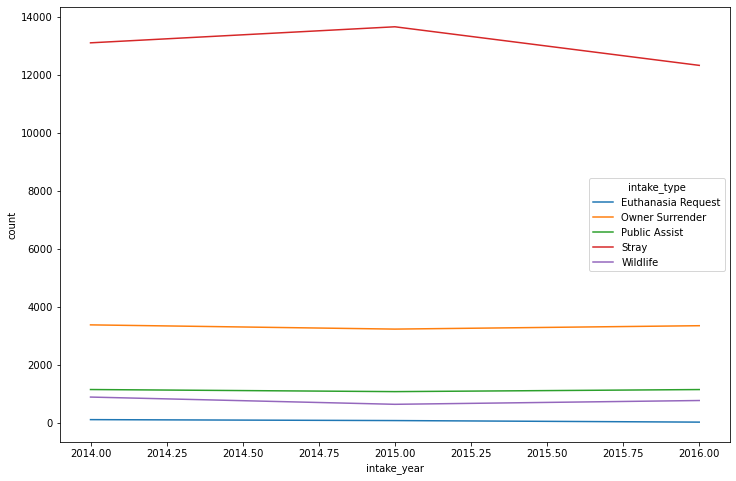

In [81]:
condA = df_intake_type['intake_year'] == 2014 
condB = df_intake_type['intake_year'] == 2015
condC =df_intake_type['intake_year'] == 2016
df_intake_type = df_intake_type[condA | condB | condC]
df_intake_type

fig, ax = plt.subplots(1, figsize = (12,8))
sns.lineplot(x = 'intake_year', y = 'count', data = df_intake_type, hue = 'intake_type')

### There is not much of a trend between 2014 to 2016. 

How many mix breeds are there in total that went through the shelter? 

In [96]:
df['breed'].str.contains('Mix').value_counts() # 66999 of them are mix breed. 

True     66999
False    12673
Name: breed, dtype: int64

In [103]:
df['animal_type'].value_counts()

Dog      45366
Cat      29539
Other     4428
Bird       339
Name: animal_type, dtype: int64

In [101]:
condA = df['intake_year'] == 2014 
condB = df['intake_year'] == 2015
condC =df['intake_year'] == 2016

df_animal = df[condA | condB | condC]
df_animal

,age_upon_outcome,animal_id_outcome,date_of_birth,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,outcome_month,outcome_year,outcome_monthyear,outcome_weekday,outcome_hour,outcome_number,dob_year,dob_month,dob_monthyear,age_upon_intake,animal_id_intake,animal_type,breed,color,found_location,intake_condition,intake_type,sex_upon_intake,count,age_upon_intake_(days),age_upon_intake_(years),age_upon_intake_age_group,intake_datetime,intake_month,intake_year,intake_monthyear,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days,time_in_shelter_hours,ln(time_in_shelter_hours)
1,7 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,2555,7.0,"(5.0, 7.5]",2014-12-20 16:35:00,12,2014,2014-12,Saturday,16,2.0,2007,7,2014-12,7 years,A006100,Dog,Spinone Italiano Mix,Yellow/White,8700 Research Blvd in Austin (TX),Normal,Public Assist,Neutered Male,1,2555,7.0,"(5.0, 7.5]",2014-12-19 10:21:00,12,2014,2014-12,Friday,10,2.0,1 days 06:14:00.000000000,1.259722,30.233333,3.441486
2,6 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,2190,6.0,"(5.0, 7.5]",2014-03-08 17:10:00,3,2014,2014-03,Saturday,17,3.0,2007,7,2014-03,6 years,A006100,Dog,Spinone Italiano Mix,Yellow/White,8700 Research in Austin (TX),Normal,Public Assist,Neutered Male,1,2190,6.0,"(5.0, 7.5]",2014-03-07 14:26:00,3,2014,2014-03,Friday,14,3.0,1 days 02:44:00.000000000,1.113889,26.733333,3.322635
3,10 years,A047759,2004-04-02 00:00:00,Partner,Transfer,Neutered Male,3650,10.0,"(7.5, 10.0]",2014-04-07 15:12:00,4,2014,2014-04,Monday,15,1.0,2004,4,2014-04,10 years,A047759,Dog,Dachshund,Tricolor,Austin (TX),Normal,Owner Surrender,Neutered Male,1,3650,10.0,"(7.5, 10.0]",2014-04-02 15:55:00,4,2014,2014-04,Wednesday,15,1.0,4 days 23:17:00.000000000,4.970139,119.283333,4.789850
6,15 years,A163459,1999-10-19 00:00:00,NaN,Return to Owner,Intact Female,5475,15.0,"(12.5, 15.0]",2014-11-14 19:28:00,11,2014,2014-11,Friday,19,1.0,1999,10,2014-11,15 years,A163459,Dog,Miniature Schnauzer Mix,Black/Gray,Ih 35 And 41St St in Austin (TX),Normal,Stray,Intact Female,1,5475,15.0,"(12.5, 15.0]",2014-11-14 15:11:00,11,2014,2014-11,Friday,15,1.0,0 days 04:17:00.000000000,0.178472,4.283333,1.664557
7,15 years,A165752,1999-08-18 00:00:00,NaN,Return to Owner,Neutered Male,5475,15.0,"(12.5, 15.0]",2014-09-15 16:35:00,9,2014,2014-09,Monday,16,1.0,1999,8,2014-09,15 years,A165752,Dog,Lhasa Apso Mix,Brown/White,Gatlin Gun Rd And Brodie in Austin (TX),Normal,Stray,Neutered Male,1,5475,15.0,"(12.5, 15.0]",2014-09-15 11:28:00,9,2014,2014-09,Monday,11,1.0,0 days 05:07:00.000000000,0.213194,5.116667,1.811017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61274,8 years,A741373,2008-12-31 00:00:00,Foster,Adoption,Neutered Male,2920,8.0,"(7.5, 10.0]",2017-04-11 08:17:00,4,2017,2017-04,Tuesday,8,1.0,2008,12,2017-04,8 years,A741373,Dog,Chihuahua Shorthair,White,2708 E 3Rd St in Austin (TX),Normal,Stray,Intact Male,1,2920,8.0,"(7.5, 10.0]",2016-12-31 16:49:00,12,2016,2016-12,Saturday,16,1.0,100 days 15:28:00.000000000,100.644444,2415.466667,7.790062
61277,3 years,A741374,2013-12-31 00:00:00,NaN,Return to Owner,Intact Male,1095,3.0,"(2.5, 5.0]",2017-01-14 17:00:00,1,2017,2017-01,Saturday,17,3.0,2013,12,2017-01,3 years,A741374,Dog,Pit Bull Mix,Brown Brindle/White,300 Ferguson in Austin (TX),Normal,Stray,Intact Male,1,1095,3.0,"(2.5, 5.0]",2016-12-31 16:51:00,12,2016,2016-12,Saturday,16,3.0,14 days 00:09:00.000000000,14.006250,336.150000,5.820528
61278,2 years,A741375,2014-12-31 00:00:00,NaN,Return to Owner,Intact Male,730,2.0,"(-0.025, 2.5]",2017-01-03 17:38:00,1,2017,2017-01,Tuesday,17,1.0,2014,12,2017-01,2 years,A741375,Dog,Yorkshire Terrier,Brown/Gray,7300 Hart Lane in Austin (TX),Normal,Stray,Intact Male,1,730,2.0,"(-0.025, 2.5]",2016-12-31 18:52:00,12,2016

In [104]:
df_animal['animal_type'].value_counts()

Dog      30775
Cat      21047
Other     2916
Bird       238
Name: animal_type, dtype: int64

In [105]:
df_animal_type = df_animal.groupby(['intake_year', 'animal_type'])[['count']].count().reset_index()
df_animal_type

,intake_year,animal_type,count
0,2014,Bird,53
1,2014,Cat,6935
2,2014,Dog,10562
3,2014,Other,1095
4,2015,Bird,47
5,2015,Cat,7487
6,2015,Dog,10314
7,2015,Other,851
8,2016,Bird,138
9,2016,Cat,6625


<AxesSubplot:xlabel='intake_year', ylabel='count'>

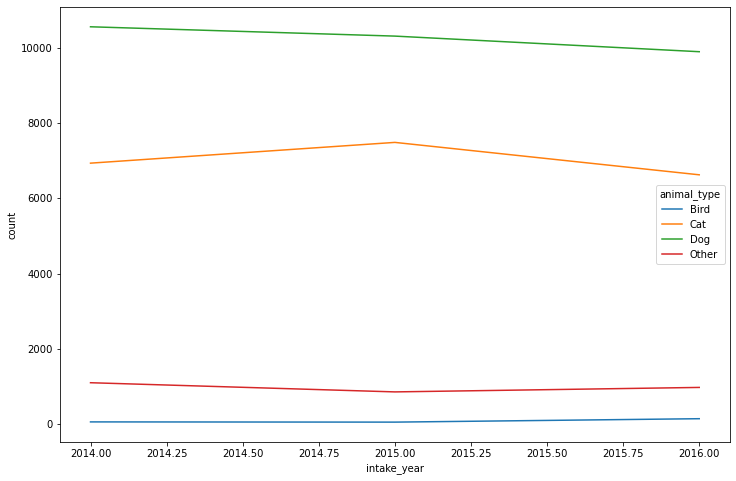

In [106]:
fig, ax = plt.subplots(1, figsize = (12,8))
sns.lineplot(x = 'intake_year', y = 'count', data = df_animal_type, hue = 'animal_type')

# Research Question 4: 
What are different types of outcome types? what are the numbers across the years? 

In [107]:
df['outcome_type'].value_counts()

Adoption           33594
Transfer           23799
Return to Owner    14791
Euthanasia          6244
Died                 690
Disposal             304
Rto-Adopt            179
Missing               46
Relocate              15
Name: outcome_type, dtype: int64

In [108]:
condA = df['intake_year'] == 2014 
condB = df['intake_year'] == 2015
condC =df['intake_year'] == 2016

df_outcome = df[condA | condB | condC]
df_outcome

,age_upon_outcome,animal_id_outcome,date_of_birth,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,outcome_month,outcome_year,outcome_monthyear,outcome_weekday,outcome_hour,outcome_number,dob_year,dob_month,dob_monthyear,age_upon_intake,animal_id_intake,animal_type,breed,color,found_location,intake_condition,intake_type,sex_upon_intake,count,age_upon_intake_(days),age_upon_intake_(years),age_upon_intake_age_group,intake_datetime,intake_month,intake_year,intake_monthyear,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days,time_in_shelter_hours,ln(time_in_shelter_hours)
1,7 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,2555,7.0,"(5.0, 7.5]",2014-12-20 16:35:00,12,2014,2014-12,Saturday,16,2.0,2007,7,2014-12,7 years,A006100,Dog,Spinone Italiano Mix,Yellow/White,8700 Research Blvd in Austin (TX),Normal,Public Assist,Neutered Male,1,2555,7.0,"(5.0, 7.5]",2014-12-19 10:21:00,12,2014,2014-12,Friday,10,2.0,1 days 06:14:00.000000000,1.259722,30.233333,3.441486
2,6 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,2190,6.0,"(5.0, 7.5]",2014-03-08 17:10:00,3,2014,2014-03,Saturday,17,3.0,2007,7,2014-03,6 years,A006100,Dog,Spinone Italiano Mix,Yellow/White,8700 Research in Austin (TX),Normal,Public Assist,Neutered Male,1,2190,6.0,"(5.0, 7.5]",2014-03-07 14:26:00,3,2014,2014-03,Friday,14,3.0,1 days 02:44:00.000000000,1.113889,26.733333,3.322635
3,10 years,A047759,2004-04-02 00:00:00,Partner,Transfer,Neutered Male,3650,10.0,"(7.5, 10.0]",2014-04-07 15:12:00,4,2014,2014-04,Monday,15,1.0,2004,4,2014-04,10 years,A047759,Dog,Dachshund,Tricolor,Austin (TX),Normal,Owner Surrender,Neutered Male,1,3650,10.0,"(7.5, 10.0]",2014-04-02 15:55:00,4,2014,2014-04,Wednesday,15,1.0,4 days 23:17:00.000000000,4.970139,119.283333,4.789850
6,15 years,A163459,1999-10-19 00:00:00,NaN,Return to Owner,Intact Female,5475,15.0,"(12.5, 15.0]",2014-11-14 19:28:00,11,2014,2014-11,Friday,19,1.0,1999,10,2014-11,15 years,A163459,Dog,Miniature Schnauzer Mix,Black/Gray,Ih 35 And 41St St in Austin (TX),Normal,Stray,Intact Female,1,5475,15.0,"(12.5, 15.0]",2014-11-14 15:11:00,11,2014,2014-11,Friday,15,1.0,0 days 04:17:00.000000000,0.178472,4.283333,1.664557
7,15 years,A165752,1999-08-18 00:00:00,NaN,Return to Owner,Neutered Male,5475,15.0,"(12.5, 15.0]",2014-09-15 16:35:00,9,2014,2014-09,Monday,16,1.0,1999,8,2014-09,15 years,A165752,Dog,Lhasa Apso Mix,Brown/White,Gatlin Gun Rd And Brodie in Austin (TX),Normal,Stray,Neutered Male,1,5475,15.0,"(12.5, 15.0]",2014-09-15 11:28:00,9,2014,2014-09,Monday,11,1.0,0 days 05:07:00.000000000,0.213194,5.116667,1.811017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61274,8 years,A741373,2008-12-31 00:00:00,Foster,Adoption,Neutered Male,2920,8.0,"(7.5, 10.0]",2017-04-11 08:17:00,4,2017,2017-04,Tuesday,8,1.0,2008,12,2017-04,8 years,A741373,Dog,Chihuahua Shorthair,White,2708 E 3Rd St in Austin (TX),Normal,Stray,Intact Male,1,2920,8.0,"(7.5, 10.0]",2016-12-31 16:49:00,12,2016,2016-12,Saturday,16,1.0,100 days 15:28:00.000000000,100.644444,2415.466667,7.790062
61277,3 years,A741374,2013-12-31 00:00:00,NaN,Return to Owner,Intact Male,1095,3.0,"(2.5, 5.0]",2017-01-14 17:00:00,1,2017,2017-01,Saturday,17,3.0,2013,12,2017-01,3 years,A741374,Dog,Pit Bull Mix,Brown Brindle/White,300 Ferguson in Austin (TX),Normal,Stray,Intact Male,1,1095,3.0,"(2.5, 5.0]",2016-12-31 16:51:00,12,2016,2016-12,Saturday,16,3.0,14 days 00:09:00.000000000,14.006250,336.150000,5.820528
61278,2 years,A741375,2014-12-31 00:00:00,NaN,Return to Owner,Intact Male,730,2.0,"(-0.025, 2.5]",2017-01-03 17:38:00,1,2017,2017-01,Tuesday,17,1.0,2014,12,2017-01,2 years,A741375,Dog,Yorkshire Terrier,Brown/Gray,7300 Hart Lane in Austin (TX),Normal,Stray,Intact Male,1,730,2.0,"(-0.025, 2.5]",2016-12-31 18:52:00,12,2016

In [109]:
df_outcome_type = df_outcome.groupby(['intake_year', 'outcome_type'])[['count']].count().reset_index()
df_outcome_type

,intake_year,outcome_type,count
0,2014,Adoption,7095
1,2014,Died,123
2,2014,Disposal,105
3,2014,Euthanasia,1839
4,2014,Missing,4
5,2014,Relocate,5
6,2014,Return to Owner,3296
7,2014,Transfer,6174
8,2015,Adoption,7502
9,2015,Died,184


<AxesSubplot:xlabel='intake_year', ylabel='count'>

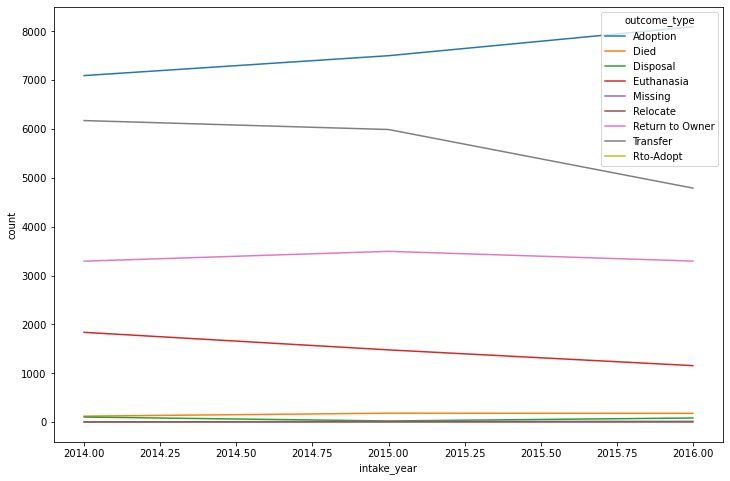

In [112]:
fig, ax = plt.subplots(1, figsize = (12,8))
sns.lineplot(x = 'intake_year', y = 'count', data = df_outcome_type, hue = 'outcome_type')

### Comments: 
Adoptation numbers has been increasing, something to be happy about! 

# Research Question 5: 

One popular belief is that, older animals tend to get abandoned by their owners, especially dogs. I would like to verify if this theory is true. However, I do have some faith in humanity that this is not true. 

In [114]:
df['intake_type'].value_counts() #we are only interested in "owner surrender animals". 

Stray                 55935
Owner Surrender       15028
Public Assist          4994
Wildlife               3464
Euthanasia Request      251
Name: intake_type, dtype: int64

<AxesSubplot:xlabel='intake_type', ylabel='age_upon_intake_(years)'>

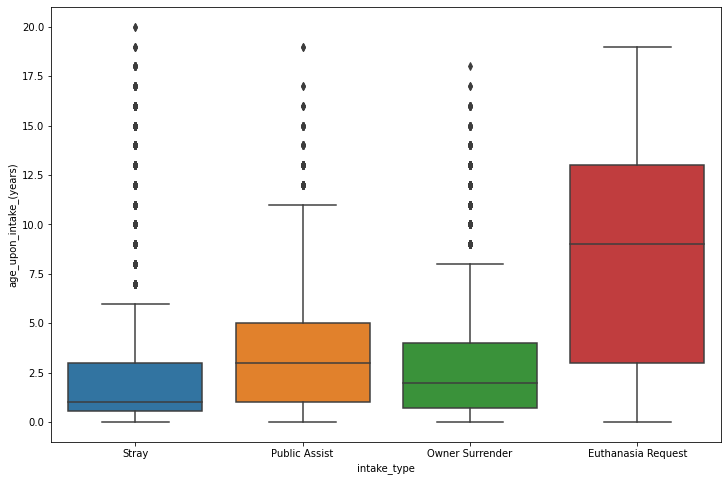

In [127]:
cond_dog = df['animal_type'] == 'Dog'
df_dog = df[cond_dog]
fig, ax = plt.subplots(1, figsize = (12,8))
sns.boxplot(x = 'intake_type', y = 'age_upon_intake_(years)', data= df_dog)

In [131]:
df_dog.groupby('intake_type')['age_upon_intake_(years)'].describe()

,count,mean,std,min,25%,50%,75%,max
intake_type,,,,,,,,
Euthanasia Request,182.0,8.101656,5.300896,0.008219,3.000000,9.0,13.0,19.0
Owner Surrender,8924.0,2.731039,2.975718,0.000000,0.739726,2.0,4.0,18.0
Public Assist,4103.0,3.500857,2.956218,0.002740,1.000000,3.0,5.0,19.0
Stray,32157.0,2.530904,2.996873,0.000000,0.575342,1.0,3.0,20.0


Comments: We generally see a much higher median age for Euthanasia Request than any other intake_type. Owner's surrendered dog have a median age of 2, and is not as high as the theory suggest. 